# Prosper Loan Data Exploration
## by Smily Garg

Introduction :

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling

In [41]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [44]:
# load in the dataset into dataframe
df_original = pd.read_csv("prosperLoanData.csv")

In [45]:
df = df.copy()
df.head(20)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1


In [46]:
print(df.duplicated().sum())
print(df["ListingKey"].duplicated().sum())

0
871


In [47]:
df.drop_duplicates(subset="ListingKey", keep=False, inplace=True)
df["ListingKey"].duplicated().sum()

0

In [48]:
closed = ["ChargedOff", "Completed", "Defaulted"]
df[df["LoanStatus"].isin(closed)].shape[0]
columns = ['ListingKey','LoanStatus','BorrowerAPR','ProsperRating (Alpha)','EmploymentStatus','DebtToIncomeRatio','IncomeRange','StatedMonthlyIncome','TotalProsperLoans','TotalProsperPaymentsBilled','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','LoanOriginalAmount','MonthlyLoanPayment']
df = df.loc[loans[loans["LoanStatus"].isin(closed_status)].index,columns]

In [51]:
df.shape

(39602, 16)

In [52]:
# cleaning
df.rename(columns={"ProsperRating (Alpha)":"ProsperRating_Alpha", "ProsperPrincipalBorrowed":"PriorBorrowed", "ProsperPrincipalOutstanding" : "PriorOutstanding", "StatedMonthlyIncome": "MonthlyIncome", "TotalProsperLoans":"PriorLoans", "TotalProsperPaymentsBilled":"PriorOnTime"}, inplace = True)
df["PriorLate"]=df["ProsperPaymentsLessThanOneMonthLate"]+df["ProsperPaymentsOneMonthPlusLate"]
df.drop(columns=['ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate'], inplace=True)

In [53]:
df["Paid"]=df.LoanStatus == "Completed"

In [54]:
df.sample(20)

,ListingKey,LoanStatus,BorrowerAPR,ProsperRating_Alpha,EmploymentStatus,DebtToIncomeRatio,IncomeRange,MonthlyIncome,PriorLoans,PriorOnTime,PriorBorrowed,PriorOutstanding,LoanOriginalAmount,MonthlyLoanPayment,PriorLate,Paid
10533,0403337645439474797CC6E,Completed,0.08718,NaN,Not available,0.24,Not displayed,7538.333333,NaN,NaN,NaN,NaN,1000,30.88,NaN,True
24707,BB543378757197567B34CB6,Completed,0.15713,NaN,Not available,0.12,Not displayed,1666.666667,NaN,NaN,NaN,NaN,2500,83.60,NaN,True
90002,268734173378692825ACF9F,Completed,0.18302,NaN,Full-time,0.83,"$25,000-49,999",2793.833333,NaN,NaN,NaN,NaN,8500,299.39,NaN,True
1722,314134800090240825BD66E,Completed,0.12309,A,Full-time,0.11,"$50,000-74,999",5250.000000,NaN,NaN,NaN,NaN,8500,245.02,NaN,True
104089,753933945724938367E537F,Completed,0.12289,NaN,Full-time,0.12,"$25,000-49,999",3333.333333,NaN,NaN,NaN,NaN,5000,165.09,NaN,True
44625,FC853509334668007171846,Completed,0.16147,B,Employed,0.08,"$50,000-74,999",5000.000000,NaN,NaN,NaN,NaN,7000,239.21,NaN,True
13021,36793545173403704C5DD59,Completed,0.35797,HR,Employed,0.17,"$50,000-74,999",4333.333333,NaN,NaN,NaN,NaN,4000,173.71,NaN,True
2165,288E3422702360703F1AFD0,Completed,0.09479,NaN,Full-time,0.24,"$50,000-74,999",4358.333333,NaN,NaN,NaN,NaN,3800,119.25,NaN,True
48498,FDAC34841814487744C10EB,Completed,0.37453,HR,Full-time,0.39,"$25,000-49,999",3333.333333,NaN,NaN,NaN,NaN,7000,294.94,NaN,True
78747,DC833514194699584685B27,Completed,0.08331,AA,Employed,0.06,"$75,000-99,999",8250.000000,NaN,NaN,NaN,NaN,2000,62.66,NaN,True


### What is the structure of your dataset?

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.Since listing key and number should be unique , but  there are around  871 duplicated listing keys (and numbers).
Also, there are large no of columns (81) and I only want columns containing closed loans (excluding cancelled loans), now after all these operations, my dataset has 43066 loans and 16 columns.

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest in my dataset is to check loans which are closed (loans which are in completed, defaulted or charged off).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features which can help to support my investigation are as follows:
* Loan Status
* Loan Amount
* Borrower APR
* Prosper Rating
* Income Range
* Prior Loans
* Paid

## Univariate Exploration

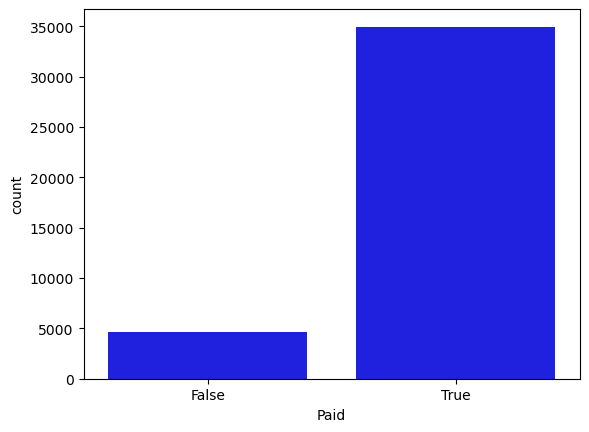

In [57]:
sb.countplot(data=df, x="Paid", color = 'b');

In [61]:
print(df["Paid"].value_counts()/df.shape[0])
print(df.groupby(["Paid"]).LoanOriginalAmount.sum()/df.LoanOriginalAmount.sum())

True     0.882405
False    0.117595
Name: Paid, dtype: float64
Paid
False    0.119874
True     0.880126
Name: LoanOriginalAmount, dtype: float64


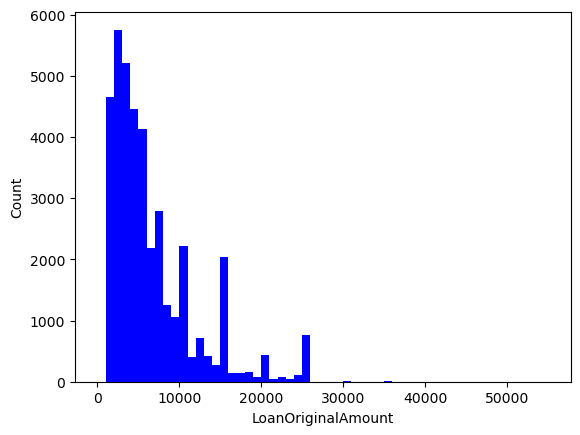

In [64]:
# amount of loan plotted on histogram
bin_group = np.arange(0,55000+1000,1000)
plt.hist(df.LoanOriginalAmount, bins=bin_group,color='b')
plt.xlabel("LoanOriginalAmount")
plt.ylabel("Count");

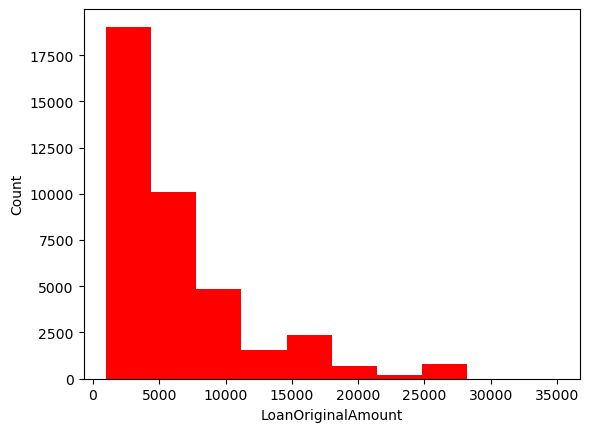

In [65]:
plt.hist(loans.LoanOriginalAmount,color='r')
plt.xlabel("LoanOriginalAmount")
plt.ylabel("Count");

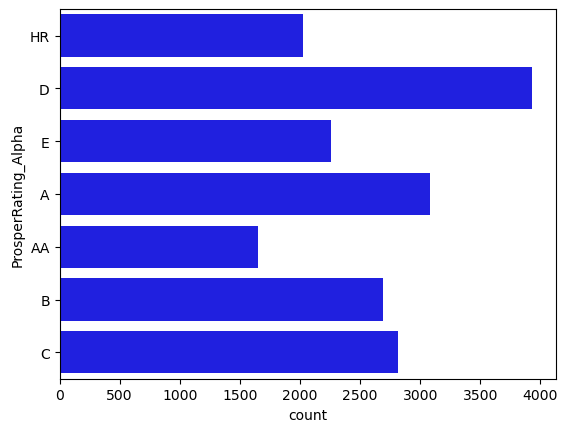

In [72]:
# Plotting ProsperRating_Alpha using countplot
sb.countplot(data=df, y="ProsperRating_Alpha",color='b');

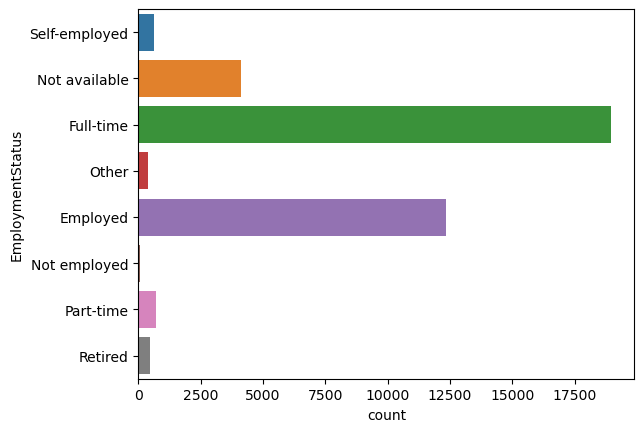

In [73]:
# Plotting EmploymentStatus using countplot
sb.countplot(data=df, y="EmploymentStatus");

In [74]:
df.EmploymentStatus.replace(["Self-employed","Full-time","Part-time"],"Employed", inplace=True)

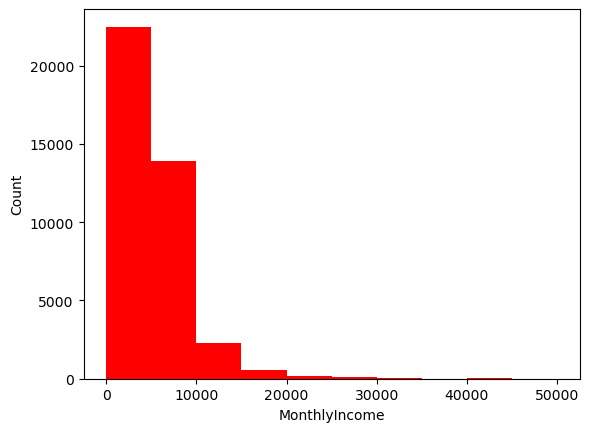

In [77]:
# Plotting MonthlyIncome using countplot
plt.hist(df.MonthlyIncome, color='r')
plt.xlabel("MonthlyIncome")
plt.ylabel("Count");

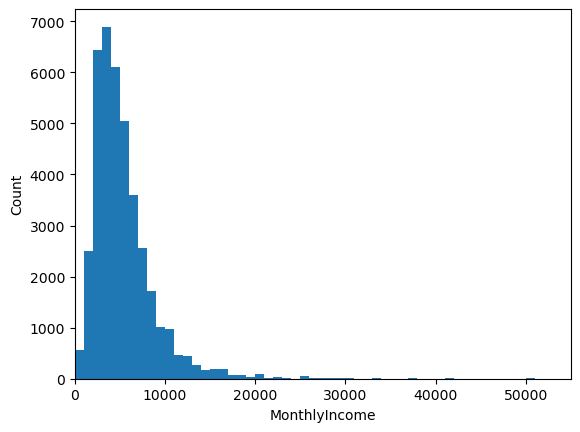

In [78]:
bin_group = np.arange(0, 55000,1000)
plt.hist(df.MonthlyIncome, bins=bin_group)
plt.xlim(0,55000)
plt.xlabel("MonthlyIncome")
plt.ylabel("Count");

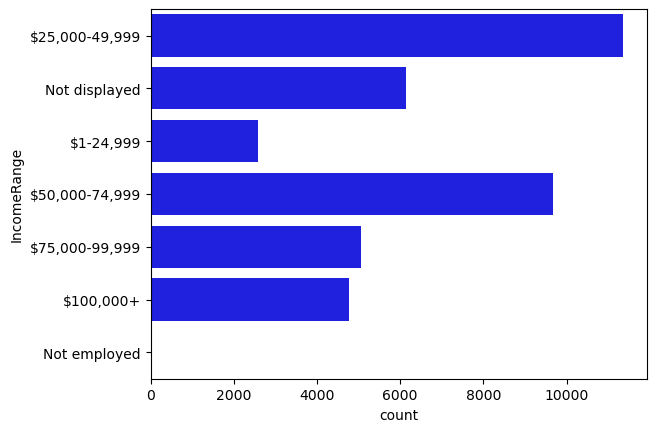

In [81]:
sb.countplot(data=df, y="IncomeRange", color = 'b');

In [83]:
df=df[df.MonthlyIncome <= 50000]
df.PriorLoans.fillna(0, inplace=True)
df.sample(5)

,ListingKey,LoanStatus,BorrowerAPR,ProsperRating_Alpha,EmploymentStatus,DebtToIncomeRatio,IncomeRange,MonthlyIncome,PriorLoans,PriorOnTime,PriorBorrowed,PriorOutstanding,LoanOriginalAmount,MonthlyLoanPayment,PriorLate,Paid
59256,755D34307576252876DACAE,Completed,0.21480,NaN,Employed,0.03,"$50,000-74,999",5350.000000,1.0,11.0,3001.0,0.00,1500,55.75,0.0,True
46236,92C13502260555503D763E6,Completed,0.25424,D,Employed,0.22,"$50,000-74,999",5166.666667,1.0,30.0,5000.0,1007.65,7500,286.39,0.0,True
89224,3CA03412231946209998ED5,Completed,0.22034,NaN,Employed,0.19,"$50,000-74,999",6066.666667,1.0,6.0,10000.0,8796.91,5000,185.31,0.0,True
101800,F0D0341602932167383D3D4,Completed,0.09882,NaN,Employed,0.59,"$25,000-49,999",2916.666667,0.0,NaN,NaN,NaN,1500,47.35,NaN,True
14230,AF233500036211194A6F9F0,Completed,0.29520,D,Employed,0.22,"$50,000-74,999",5805.416667,1.0,11.0,5000.0,0.00,5000,201.45,0.0,True


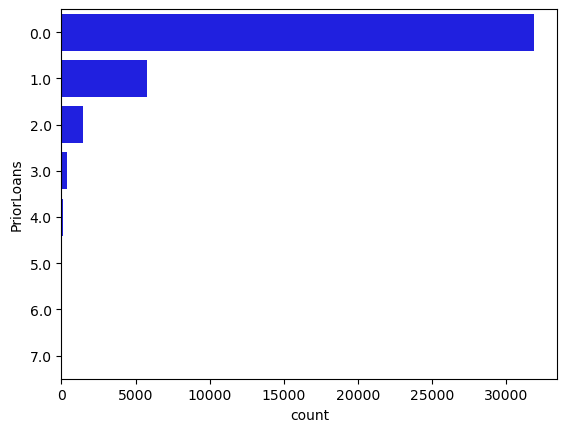

In [84]:
sb.countplot(data=df,y="PriorLoans", color='b');

In [85]:
# if DebtToIncomeRatio is greater than 1 then filter out the data
df = df[df.DebtToIncomeRatio <= 1]

In [88]:
# Loan-income ratio
df["LoanIncome"] = df.LoanOriginalAmount / (df.MonthlyIncome * 12)
df.LoanIncome.replace(np.inf,np.nan, inplace=True)

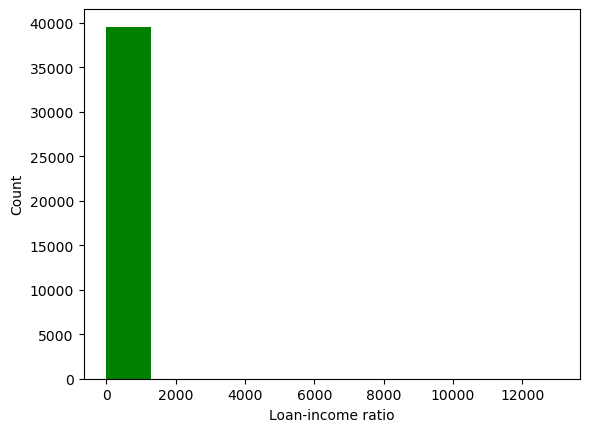

In [90]:
plt.hist(df.LoanIncome,color='g')
plt.xlabel("Loan-income ratio")
plt.ylabel("Count");

In [91]:
df=df[df.LoanIncome <= 1]

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

On the basis of values in Loan Status column , a new column has been created 'Paid' whose value is True if the status is completed else False.


## Bivariate Exploration

In [96]:
df.sample(5)


,ListingKey,LoanStatus,BorrowerAPR,ProsperRating_Alpha,EmploymentStatus,DebtToIncomeRatio,IncomeRange,MonthlyIncome,PriorLoans,PriorOnTime,PriorBorrowed,PriorOutstanding,LoanOriginalAmount,MonthlyLoanPayment,PriorLate,Paid,LoanIncome
25628,6BB335927535455100F807F,Completed,0.34752,HR,Employed,0.41,"$25,000-49,999",3383.500000,0.0,NaN,NaN,NaN,4000,171.45,NaN,True,0.098517
89369,D8B63373398192775FA4BF5,Completed,0.21806,NaN,Not available,0.11,Not displayed,3500.000000,0.0,NaN,NaN,NaN,1000,37.14,NaN,True,0.023810
53344,1D613410191707401E18413,Completed,0.13625,NaN,Employed,0.20,"$50,000-74,999",4833.333333,0.0,NaN,NaN,NaN,5700,187.96,NaN,True,0.098276
65119,B33E3413965433065A44E42,Completed,0.19904,NaN,Employed,0.43,"$75,000-99,999",6666.666667,0.0,NaN,NaN,NaN,2750,96.92,NaN,True,0.034375
103881,0E08355624469469819F60C,Completed,0.35797,HR,Employed,0.16,"$25,000-49,999",3000.000000,0.0,NaN,NaN,NaN,4000,173.71,NaN,True,0.111111


In [ ]:
rel_col = ["LoanOriginalAmount", "BorrowerAPR","MonthlyIncome", "DebtToIncomeRatio", "LoanIncome"]

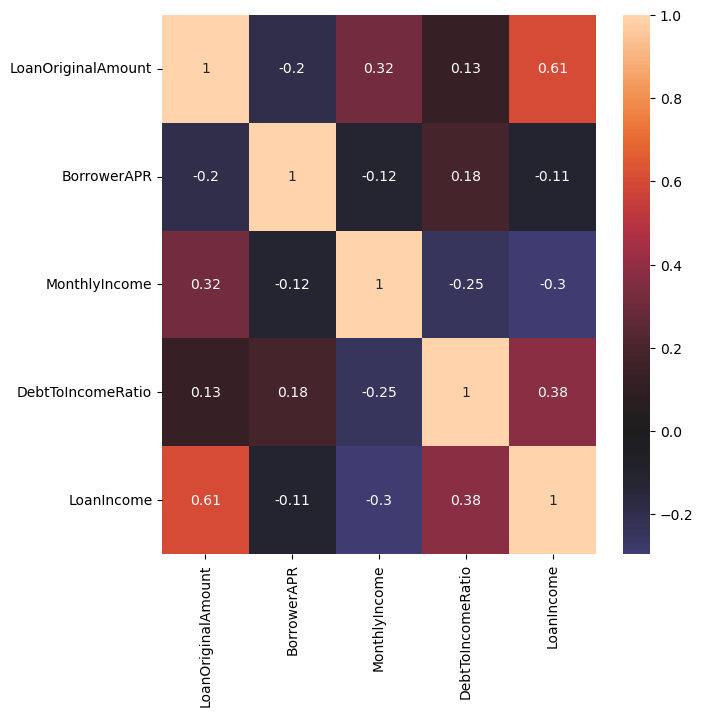

In [98]:
plt.figure(figsize = [7, 7])
sb.heatmap(df[rel_col].corr(), annot = True, center = 0)
plt.show()

In [100]:
var_temp=df.groupby(["ProsperRating_Alpha"])["Paid"].value_counts(normalize=True).mul(100)
var_temp=var_temp.reset_index(name="ProsperRatingPaidPercent")
var_temp

,ProsperRating_Alpha,Paid,ProsperRatingPaidPercent
0,A,True,97.601297
1,A,False,2.398703
2,AA,True,98.847787
3,AA,False,1.152213
4,B,True,97.067558
5,B,False,2.932442
6,C,True,95.985790
7,C,False,4.014210
8,D,True,93.606724
9,D,False,6.393276


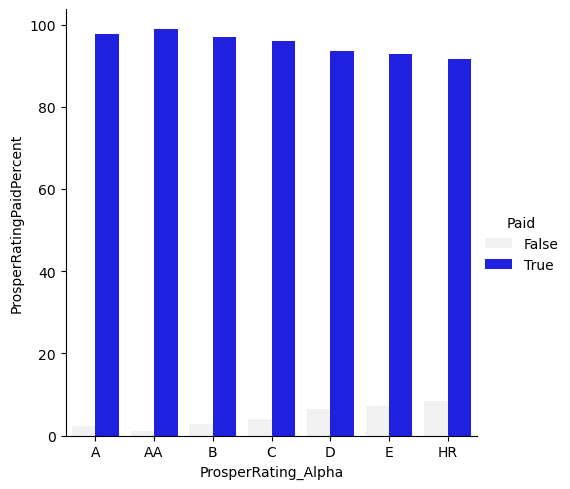

In [109]:
sb.catplot(data=var_temp, x="ProsperRating_Alpha",y="ProsperRatingPaidPercent", hue="Paid", kind="bar",color='b');

In [110]:
var_temp2=df.groupby(["EmploymentStatus"])["Paid"].value_counts(normalize=True).mul(100)
var_temp2=var_temp2.reset_index(name="EmploymentStatusPaidPercent")
var_temp2

,EmploymentStatus,Paid,EmploymentStatusPaidPercent
0,Employed,True,91.122283
1,Employed,False,8.877717
2,Not available,True,72.210012
3,Not available,False,27.789988
4,Not employed,True,91.666667
5,Not employed,False,8.333333
6,Other,True,89.460154
7,Other,False,10.539846
8,Retired,True,88.723404
9,Retired,False,11.276596


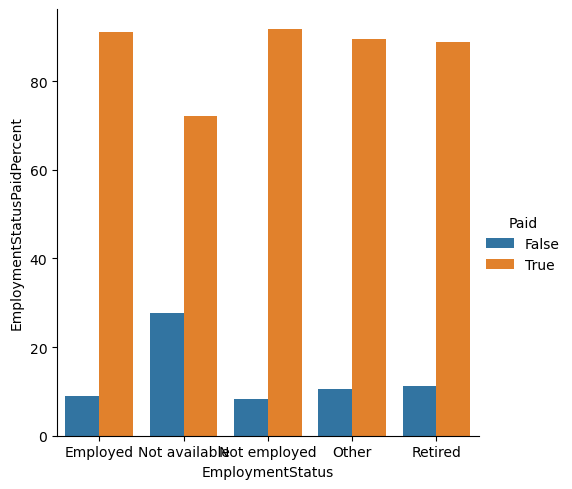

In [113]:
sb.catplot(data=var_temp2, x="EmploymentStatus",y="EmploymentStatusPaidPercent", hue="Paid", kind="bar");

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It seems there is a positive correlation between unpaid loans and debt-to-income ratio, the Prosper rating, the loan amount and the employment status.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is a positive correlation between debt income and loan income ratio.

## Multivariate Exploration

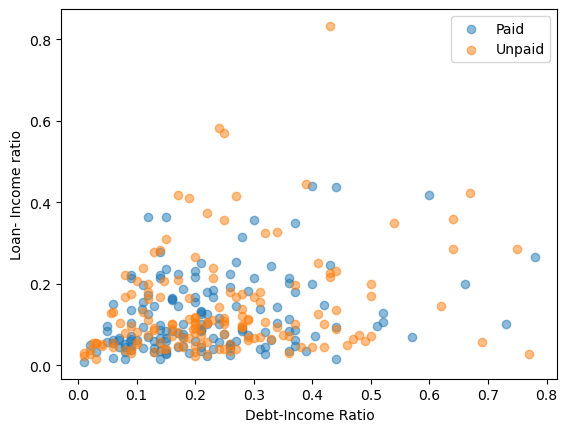

In [116]:
df_paid = df[df['Paid'] == True].sample(150)
df_unpaid = df[df['Paid'] == False].sample(150)
plt.scatter(data = df_paid, x = 'DebtToIncomeRatio', y = 'LoanIncome',alpha=0.5)
plt.scatter(data = df_unpaid, x = 'DebtToIncomeRatio', y = 'LoanIncome', alpha=0.5)
plt.legend(['Paid','Unpaid'])
plt.xlabel("Debt-Income Ratio")
plt.ylabel("Loan- Income ratio");

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


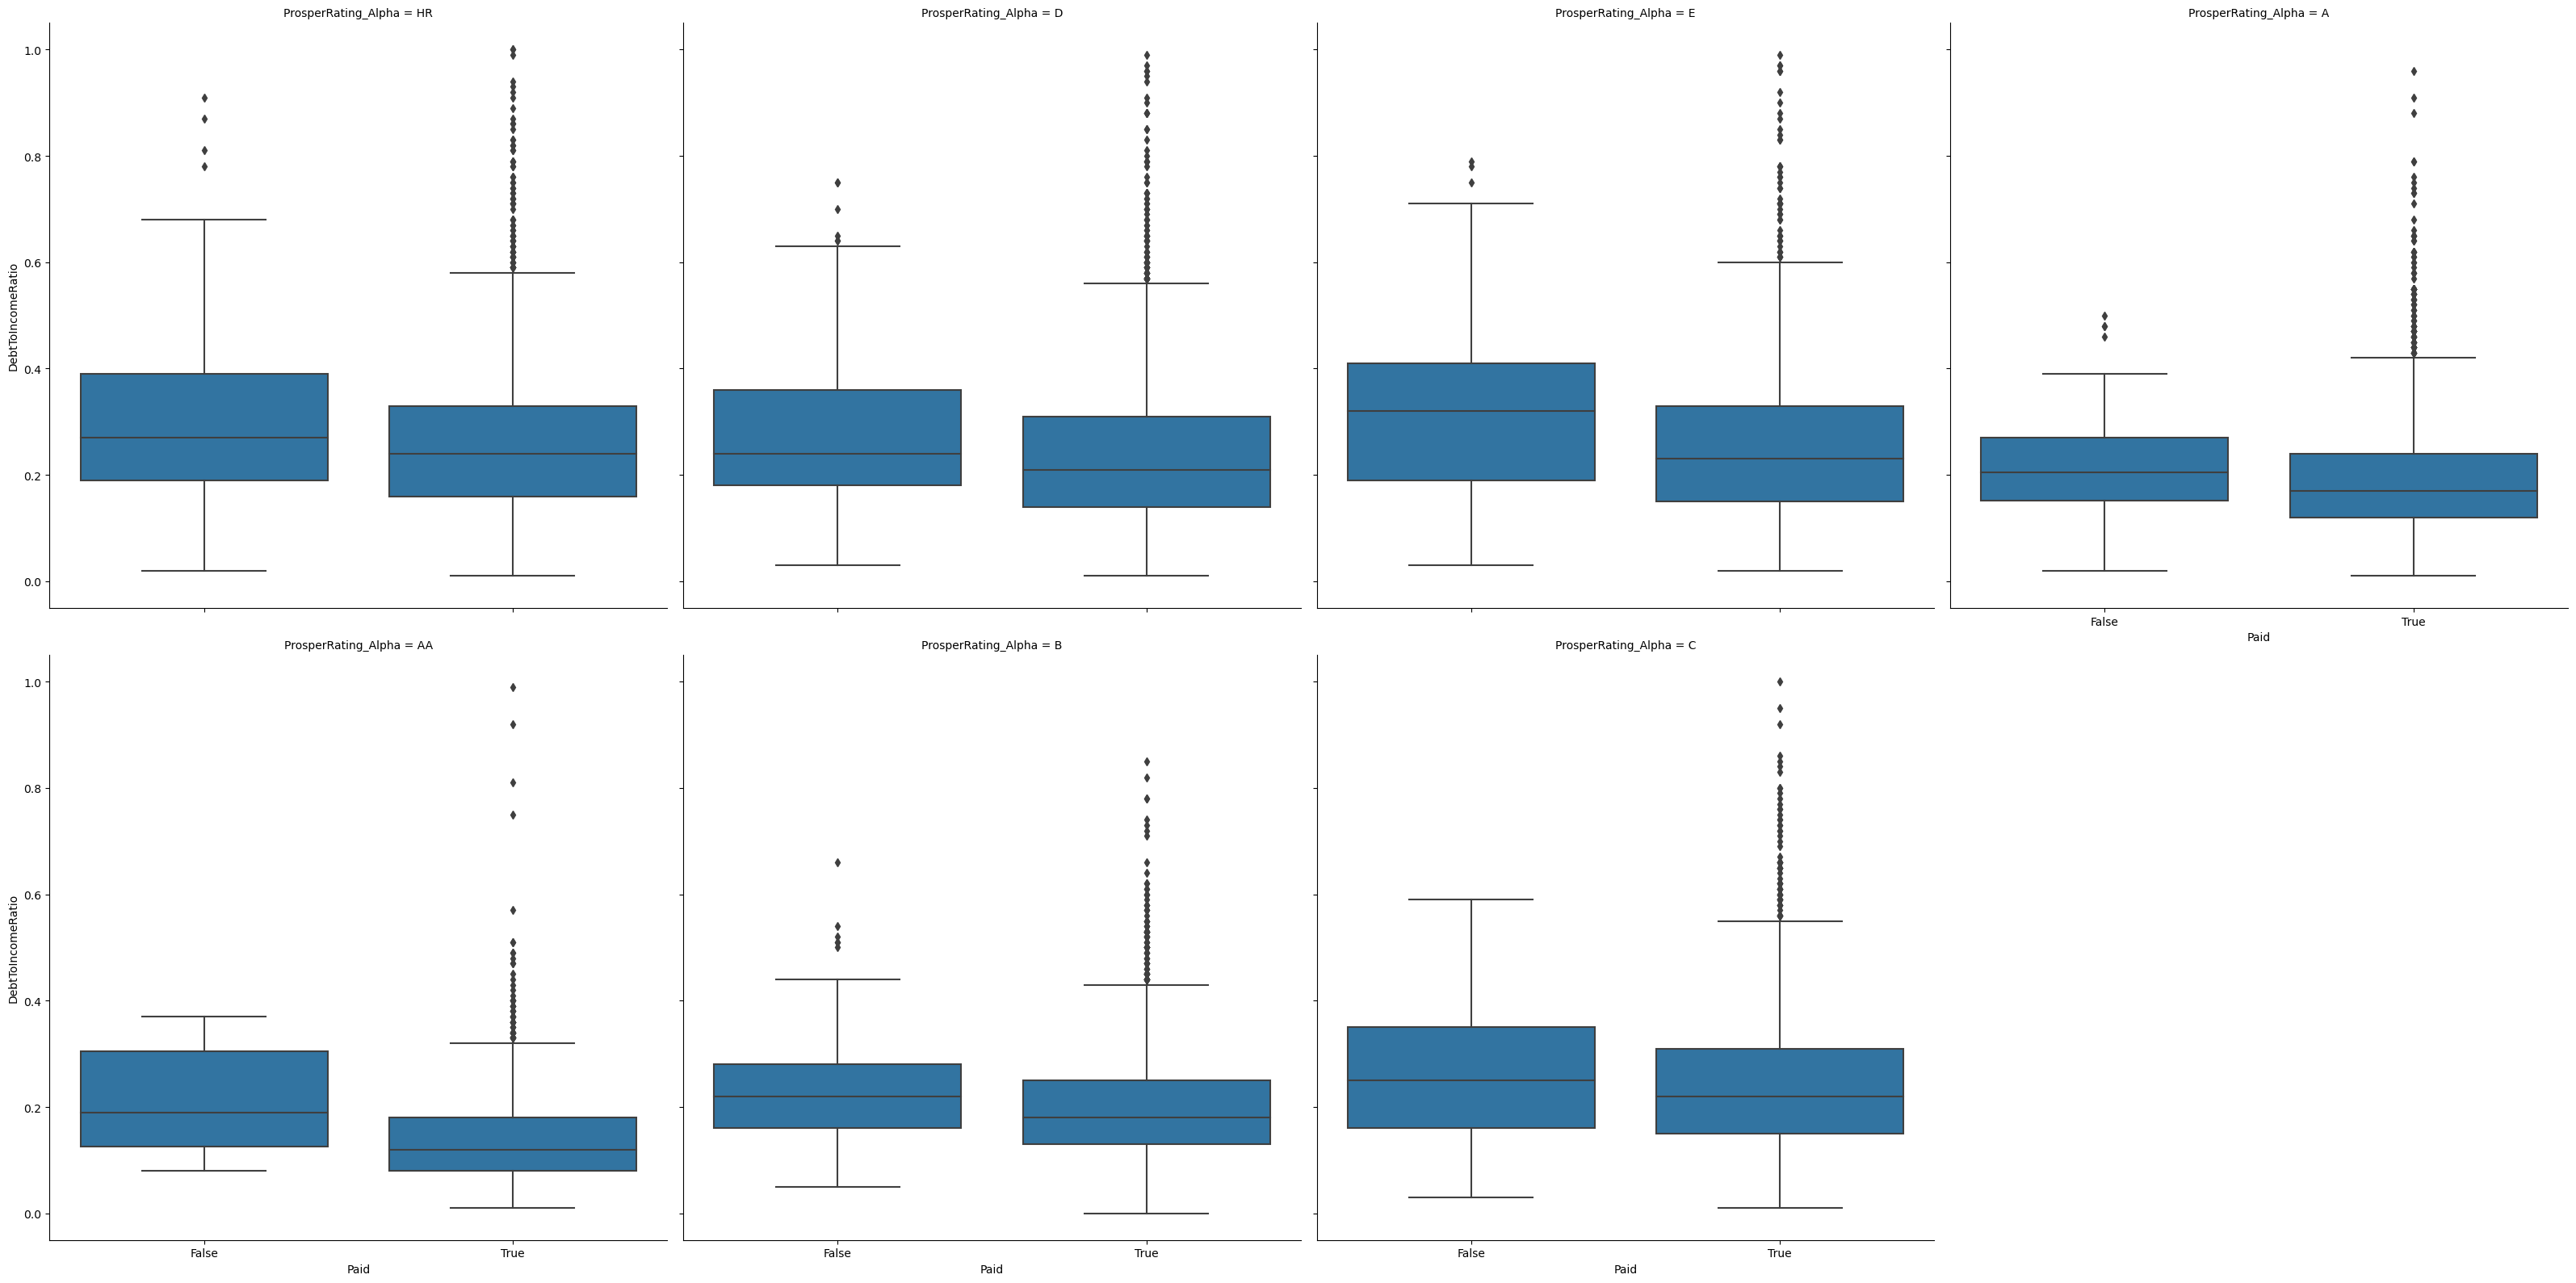

In [118]:
grid_var = sb.FacetGrid(data = df, col = 'ProsperRating_Alpha', height = 8, col_wrap=4)
grid_var.map(sb.boxplot, 'Paid', 'DebtToIncomeRatio');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest? Were there any interesting or surprising interactions between features?

It has been observed that there is a positive correlation between debt-to-income ratio and unpaid loans.

In [119]:
loans.to_csv("final_loans.csv", index=False)